In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [569]:
#Read the data and print out some rows
data = pd.read_csv('Covid_stats.csv', encoding='latin1')
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\r\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,NaN,NaN,"8,281"


In [570]:
data_copy = data.copy()

In [571]:
data_copy

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\r\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,NaN,NaN,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,NaN,NaN,NaN,"58,055"
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [572]:
data_copy.rename(columns={
    'Country,Other': 'Country',
    'Serious,Critical': 'Serious',
    'TotÿCases/1M pop': 'TotalCases_per_1M',
    'Deaths/1M pop': 'Deaths_per_1M',
    'Tests/\r\n1M pop': 'Tests_per_1M',
    '1 Caseevery X ppl': '1_Case_every_X_ppl',
    '1 Deathevery X ppl': '1_Death_every_X_ppl',
    '1 Testevery X ppl': '1_Test_every_X_ppl', 
    'New Cases/1M pop': 'New_Cases_per_1M',
    'New Deaths/1M pop': 'New_Deaths_per_1M',
    'Active Cases/1M pop': 'Active_Cases_per_1M'
}, inplace=True)
# Handle missing values (impute with 0 for numerical columns)
numerical_cols = data_copy.select_dtypes(include=np.number).columns
data_copy[numerical_cols] = data_copy[numerical_cols].fillna(0)




In [573]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,"111,820,082",0.00,"1,219,487",0.00,"109,814,428",0.00,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,0.00,0.00,"2,348"
1,India,"45,035,393",0.00,"533,570",0.00,NaN,0.00,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,0.00,0.00,0.4
2,France,"40,138,560",0.00,"167,642",0.00,"39,970,918",0.00,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,0.00,0.00,NaN
3,Germany,"38,828,995",0.00,"183,027",0.00,"38,240,600",0.00,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,0.00,0.00,"4,833"
4,Brazil,"38,743,918",0.00,"711,380",0.00,"36,249,161",0.00,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,0.00,0.00,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,NaN,0.00,NaN,0.00,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,0.00,0.00,0.00,"58,055"
227,Vatican City,29,0.00,NaN,0.00,29,0.00,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,0.00,0.00,0.00,NaN
228,Western Sahara,10,0.00,1,0.00,9,0.00,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",0.00,0.00,0.00,NaN
229,MS Zaandam,9,0.00,2,0.00,7,0.00,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN


In [574]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    object 
 2   NewCases             231 non-null    float64
 3   TotalDeaths          226 non-null    object 
 4   NewDeaths            231 non-null    float64
 5   TotalRecovered       183 non-null    object 
 6   NewRecovered         231 non-null    float64
 7   ActiveCases          184 non-null    object 
 8   Serious              53 non-null     object 
 9   TotalCases_per_1M    229 non-null    object 
 10  Deaths_per_1M        224 non-null    object 
 11  TotalTests           212 non-null    object 
 12  Tests_per_1M         212 non-null    object 
 13  Population           228 non-null    object 
 14  Continent            228 non-null    object 
 15  1_Case_every_X_ppl   228 non-null    obj

In [575]:

numeric_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                   'Serious', 'TotalCases_per_1M', 'Deaths_per_1M',
                   'TotalTests', 'Tests_per_1M', 'Population',
                   '1_Case_every_X_ppl', '1_Death_every_X_ppl', '1_Test_every_X_ppl',
                   'New_Cases_per_1M', 'New_Deaths_per_1M', 'Active_Cases_per_1M']

for column in numeric_columns:
    data_copy[column] = data_copy[column].astype(str).str.replace(',', '', regex=False)
    data_copy[column] = pd.to_numeric(data_copy[column], errors='coerce')  # Convert and coerce errors to NaN
    data_copy[column] = data_copy[column].fillna(0) # fill any new NaNs from conversion
        

# Thay thế NaN trong cột string bằng chuỗi rỗng hoặc giá trị mặc định


In [576]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,111820082,0.00,1219487.00,0.00,109814428.00,0.00,786167.00,940.00,333985.00,...,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,0.00,0.00,2348.00
1,India,45035393,0.00,533570.00,0.00,0.00,0.00,0.00,0.00,32016.00,...,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.00,0.00,0.40
2,France,40138560,0.00,167642.00,0.00,39970918.00,0.00,0.00,0.00,612013.00,...,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00,0.00,0.00
3,Germany,38828995,0.00,183027.00,0.00,38240600.00,0.00,405368.00,0.00,462891.00,...,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,0.00,0.00,4833.00
4,Brazil,38743918,0.00,711380.00,0.00,36249161.00,0.00,1783377.00,0.00,179908.00,...,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,0.00,0.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,0.00,0.00,80.00,0.00,58055.00,...,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,0.00,0.00,29.00,0.00,0.00,0.00,36295.00,...,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00,0.00,0.00
228,Western Sahara,10,0.00,1.00,0.00,9.00,0.00,0.00,0.00,16.00,...,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00,0.00,0.00
229,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [577]:
cot_bang_khong = data_copy.columns[data_copy.eq(0.00).all()]
data_copy = data_copy.drop(columns = cot_bang_khong)
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00


In [578]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   TotalDeaths          231 non-null    float64
 3   TotalRecovered       231 non-null    float64
 4   NewRecovered         231 non-null    float64
 5   ActiveCases          231 non-null    float64
 6   Serious              231 non-null    float64
 7   TotalCases_per_1M    231 non-null    float64
 8   Deaths_per_1M        231 non-null    float64
 9   TotalTests           231 non-null    float64
 10  Tests_per_1M         231 non-null    float64
 11  Population           231 non-null    float64
 12  Continent            228 non-null    object 
 13  1_Case_every_X_ppl   231 non-null    float64
 14  1_Death_every_X_ppl  231 non-null    float64
 15  1_Test_every_X_ppl   231 non-null    flo

In [579]:
data_copy.Continent = data_copy.Continent.fillna("")
data_copy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   TotalDeaths          231 non-null    float64
 3   TotalRecovered       231 non-null    float64
 4   NewRecovered         231 non-null    float64
 5   ActiveCases          231 non-null    float64
 6   Serious              231 non-null    float64
 7   TotalCases_per_1M    231 non-null    float64
 8   Deaths_per_1M        231 non-null    float64
 9   TotalTests           231 non-null    float64
 10  Tests_per_1M         231 non-null    float64
 11  Population           231 non-null    float64
 12  Continent            231 non-null    object 
 13  1_Case_every_X_ppl   231 non-null    float64
 14  1_Death_every_X_ppl  231 non-null    float64
 15  1_Test_every_X_ppl   231 non-null    flo

In [580]:
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00


In [581]:
continent_list_data = ['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America']
for i in range (len(continent_list_data)):
    continent_list_data[i] = data_copy.loc[data_copy['Continent'] == continent_list_data[i]]
continent_list_data[1]



,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
7,Italy,26723249,196487.00,26361218.00,0.00,165544.00,22.00,443445.00,3261.00,281126449.00,4665010.00,60262770.00,Europe,2.00,307.00,0.00,2747.00
8,UK,24910387,232112.00,24678275.00,0.00,0.00,0.00,363666.00,3389.00,522526476.00,7628357.00,68497907.00,Europe,3.00,295.00,0.00,0.00
9,Russia,24124215,402756.00,23545818.00,0.00,175641.00,0.00,165454.00,2762.00,273400000.00,1875095.00,145805947.00,Europe,6.00,362.00,1.00,1205.00
11,Spain,13914811,121760.00,13762417.00,0.00,30634.00,231.00,297840.00,2606.00,471036328.00,10082298.00,46719142.00,Europe,3.00,384.00,0.00,656.00
16,Netherlands,8635786,22992.00,8612599.00,0.00,195.00,0.00,501747.00,1336.00,25984435.00,1509718.00,17211447.00,Europe,2.00,749.00,1.00,11.00
20,Poland,6661991,120598.00,0.00,0.00,0.00,0.00,176524.00,3196.00,39323709.00,1041970.00,37739785.00,Europe,6.00,313.00,1.00,31941.00
22,Greece,6101379,37869.00,0.00,0.00,0.00,0.00,591412.00,3671.00,102228365.00,9909078.00,10316637.00,Europe,2.00,272.00,0.00,0.00
23,Austria,6081287,22542.00,6054934.00,0.00,3811.00,0.00,670727.00,2486.00,211273524.00,23302116.00,9066710.00,Europe,1.00,402.00,0.00,420.00


In [582]:
data_continent = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                'TotalCases':[]   ,        
                'TotalDeaths':[],   
                'TotalRecovered':[],     
                'NewRecovered':[],      
                'ActiveCases':[],       
                'Serious':[],                    
                'TotalTests':[],                
                'Population' :[],               
                }
data_continent_mean = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                        'TotalCases_per_1M':[], 
                        'Deaths_per_1M':[],
                        'Tests_per_1M':[],
                        '1_Case_every_X_ppl':[],
                        '1_Death_every_X_ppl':[],
                        '1_Test_every_X_ppl':[],
                        'Active_Cases_per_1M':[]
                    }
for i in range(6):
    for column in data_continent.keys():
        
        if column == 'Continent':
            continue
        data_continent[column].append(int(continent_list_data[i][column].sum()))
for i in range(6):
    for column in data_continent_mean.keys():
        
        if column == 'Continent':
            continue
        data_continent_mean[column].append(int(continent_list_data[i][column].mean()))
data_continent = pd.DataFrame(data_continent)
data_continent


,Continent,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalTests,Population
0,Asia,220996963,1548390,108144976,0,1424087,370,2244652039,3262885383
1,Europe,253406198,2101824,235797174,474,875221,401,2848046702,747543837
2,Africa,12860924,258892,9211514,0,331499,389,111032578,1406728744
3,Australia/Oceania,14895771,33015,14615509,0,33714,6,91668192,43470408
4,South America,70200879,1367332,65935495,0,1999425,628,245395353,437694443
5,North America,131889132,1695941,126483239,350,1332790,1083,1325710449,598140916


In [583]:
data_continent_mean = pd.DataFrame(data_continent_mean)
data_continent_mean

,Continent,TotalCases_per_1M,Deaths_per_1M,Tests_per_1M,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,Asia,167982,718,1901375,97,12621,9,10120
1,Europe,399994,2697,4539232,3,469,0,31280
2,Africa,43286,319,188328,1424,36487,27,10151
3,Australia/Oceania,250161,485,1064661,18,5252,3,51858
4,South America,187173,2372,1002151,10,721,2,25667
5,North America,228463,1536,2610661,25,1970,3,71329


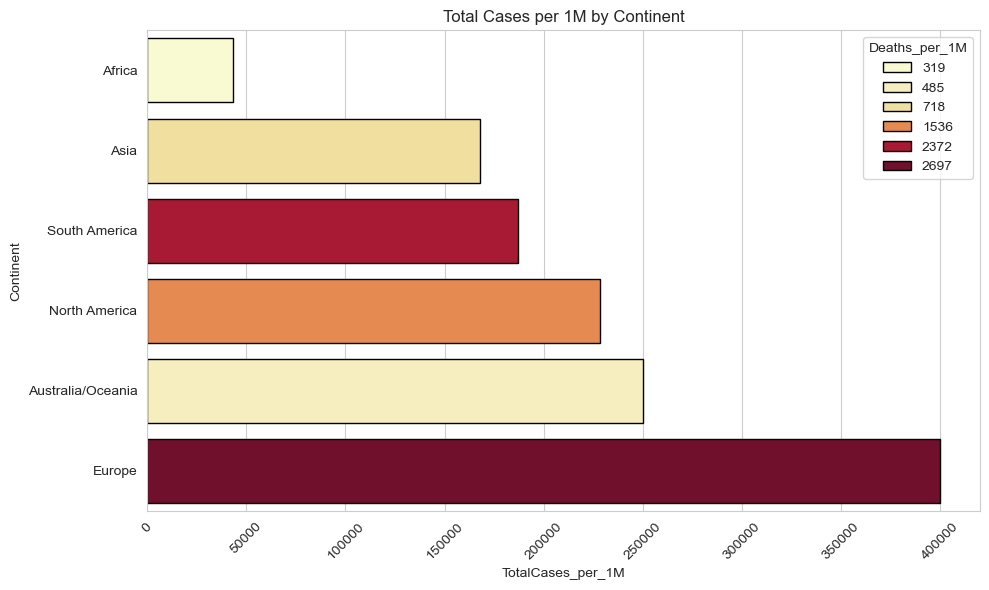

In [584]:
sns.set_style("whitegrid")

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='TotalCases_per_1M', data=data_continent_mean, palette='YlOrRd', order=data_continent_mean.sort_values('TotalCases_per_1M').Continent, hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Total Cases per 1M by Continent')
plt.ylabel('Continent')
plt.xlabel('TotalCases_per_1M')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

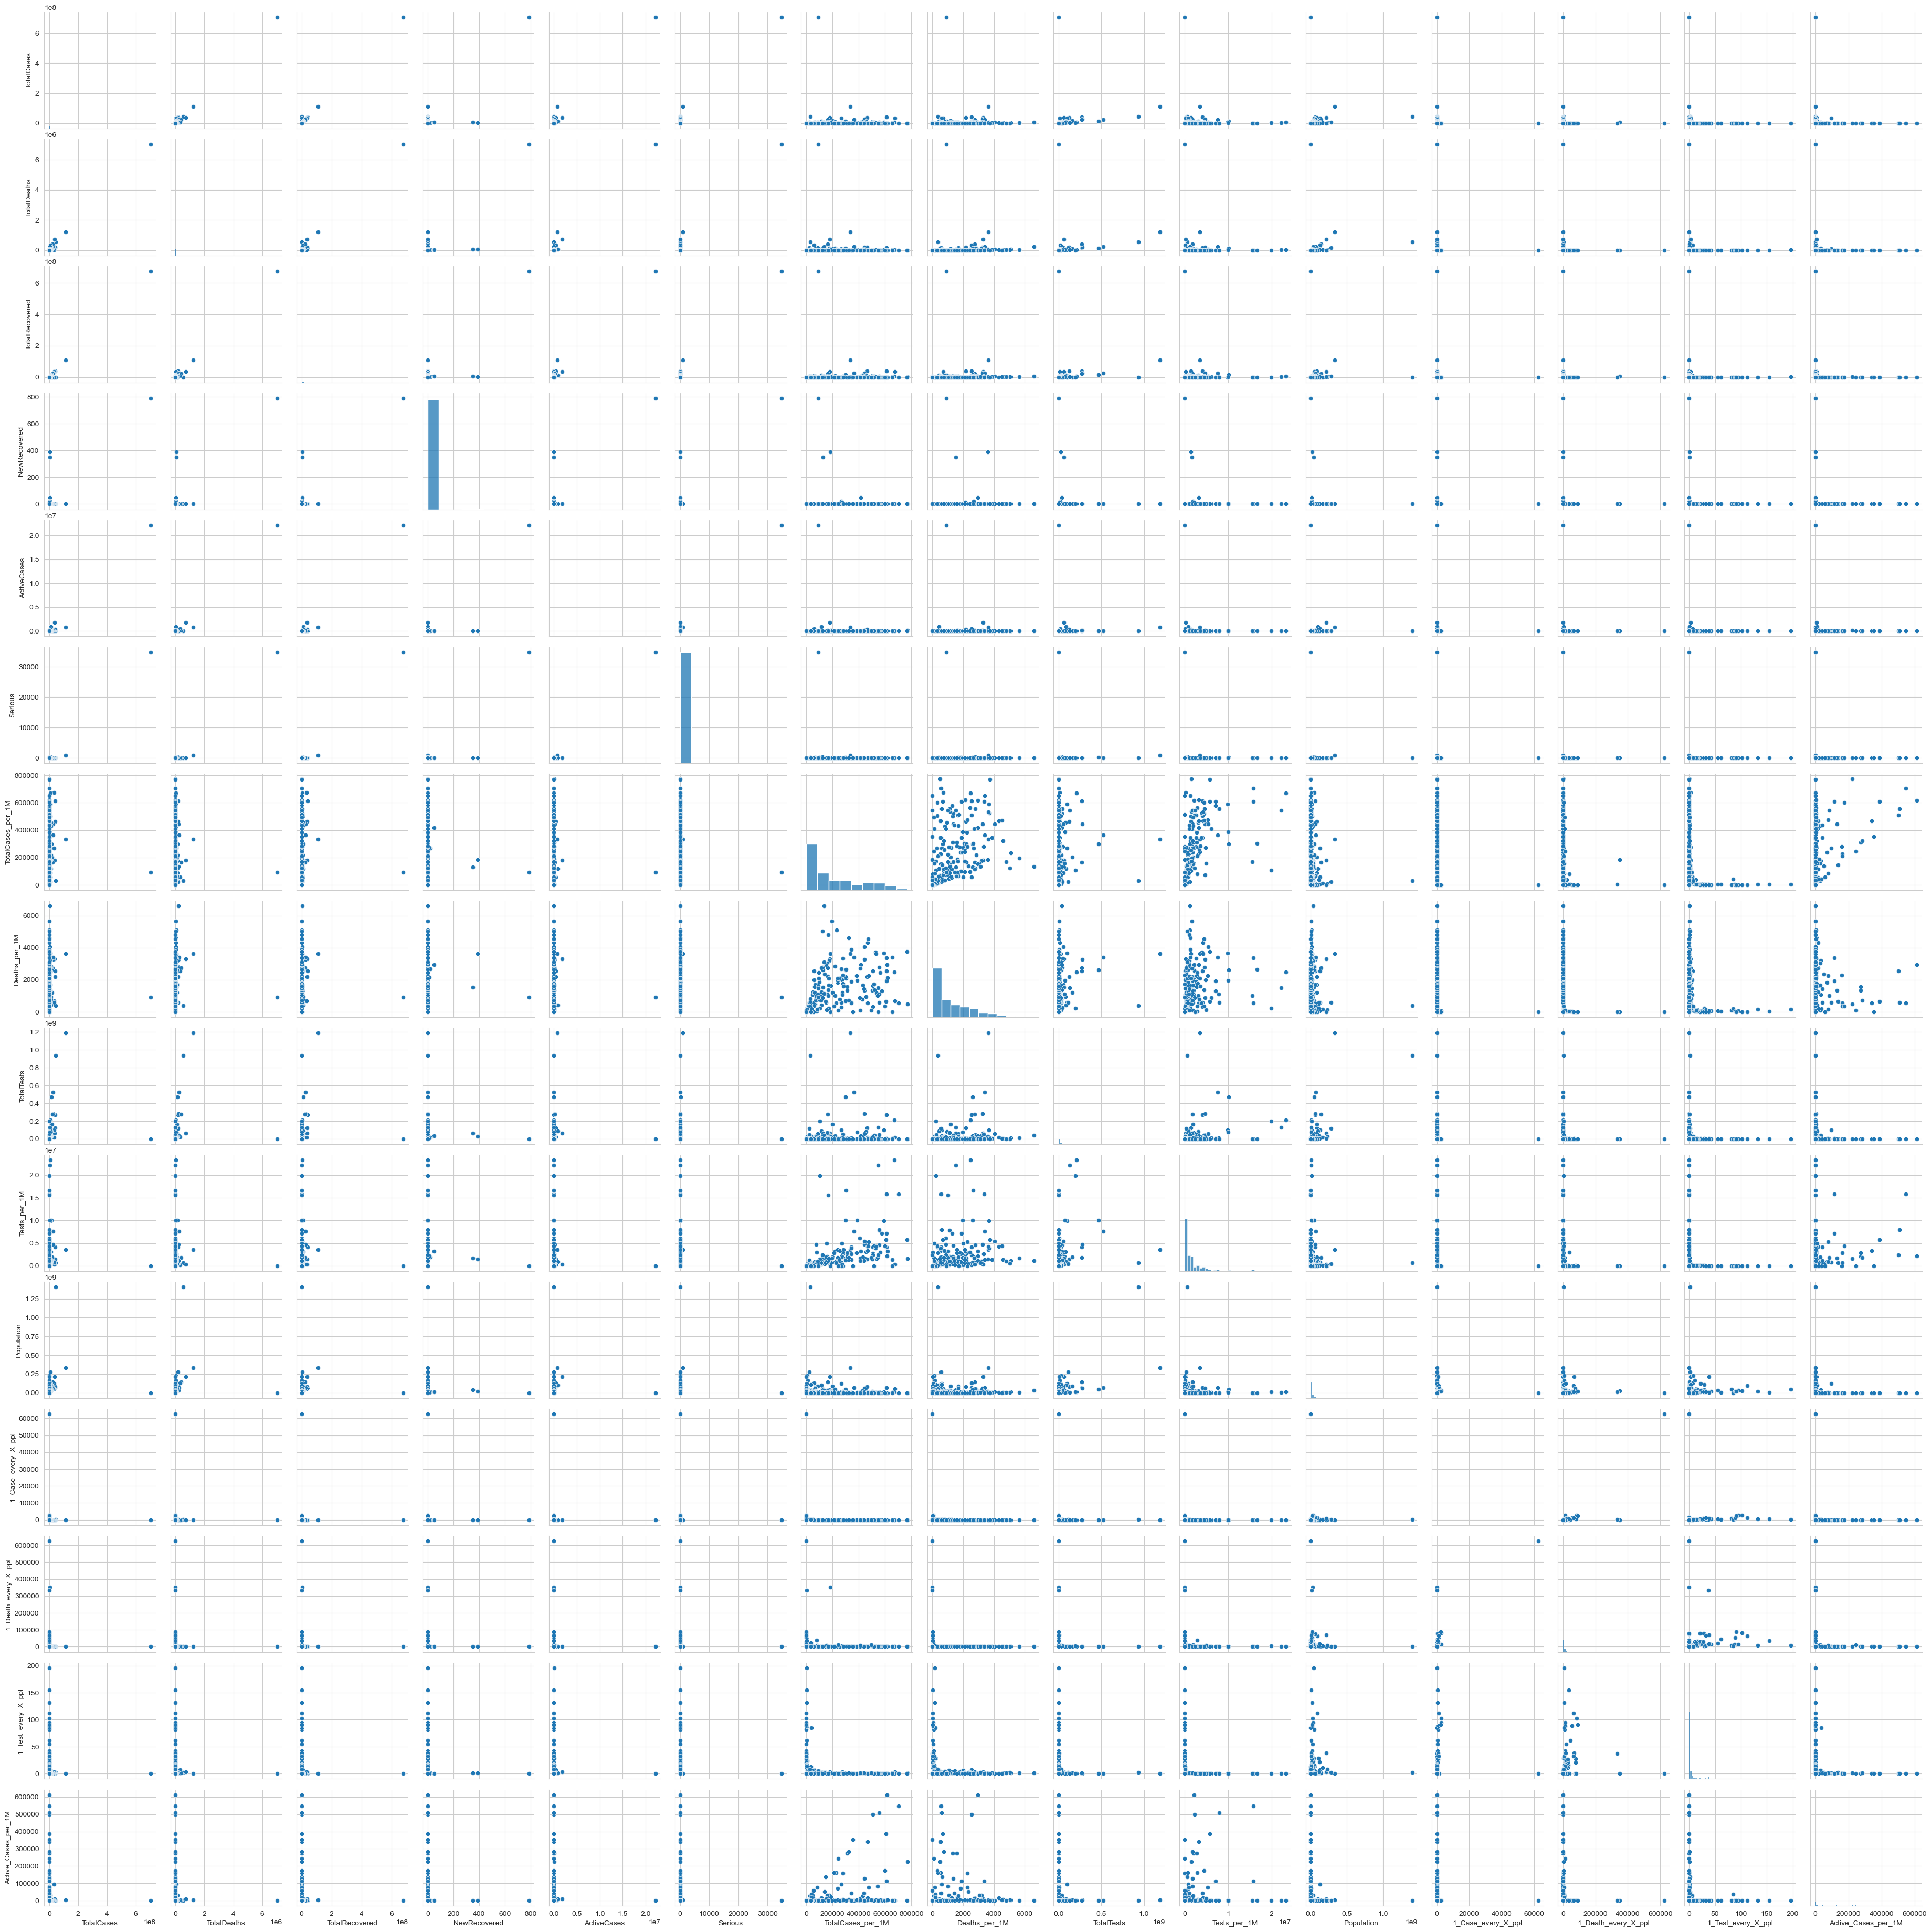

In [585]:

sns.pairplot(data_copy)





In [586]:
data_continent_mean_copy = data_continent_mean.copy()
data_continent_mean_copy = data_continent_mean_copy.drop('Continent', axis = 1)

<Axes: >

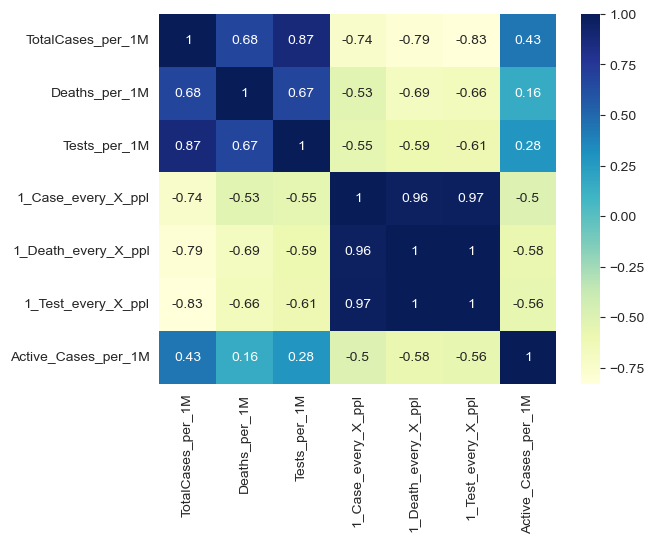

In [587]:
sns.heatmap(data_continent_mean_copy.corr(), annot=True, cmap='YlGnBu')
#Càng ít nhiều, chết càng nhiều

In [588]:
data_continent_copy = data_continent.copy()
data_continent_copy = data_continent_copy.drop('Continent', axis = 1)

<Axes: >

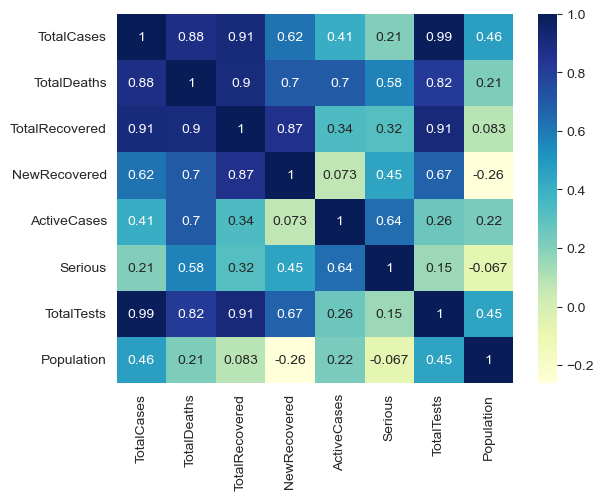

In [589]:
sns.heatmap(data_continent_copy.corr(), annot=True, cmap='YlGnBu')

In [590]:
for column in data_continent_mean_copy.columns:
    data_continent[column] = data_continent_mean_copy[column]
data_continent

,Continent,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalTests,Population,TotalCases_per_1M,Deaths_per_1M,Tests_per_1M,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,Asia,220996963,1548390,108144976,0,1424087,370,2244652039,3262885383,167982,718,1901375,97,12621,9,10120
1,Europe,253406198,2101824,235797174,474,875221,401,2848046702,747543837,399994,2697,4539232,3,469,0,31280
2,Africa,12860924,258892,9211514,0,331499,389,111032578,1406728744,43286,319,188328,1424,36487,27,10151
3,Australia/Oceania,14895771,33015,14615509,0,33714,6,91668192,43470408,250161,485,1064661,18,5252,3,51858
4,South America,70200879,1367332,65935495,0,1999425,628,245395353,437694443,187173,2372,1002151,10,721,2,25667
5,North America,131889132,1695941,126483239,350,1332790,1083,1325710449,598140916,228463,1536,2610661,25,1970,3,71329


In [591]:
data_continent_copy = data_continent.copy()
data_continent_copy = data_continent_copy.drop('Continent', axis = 1)

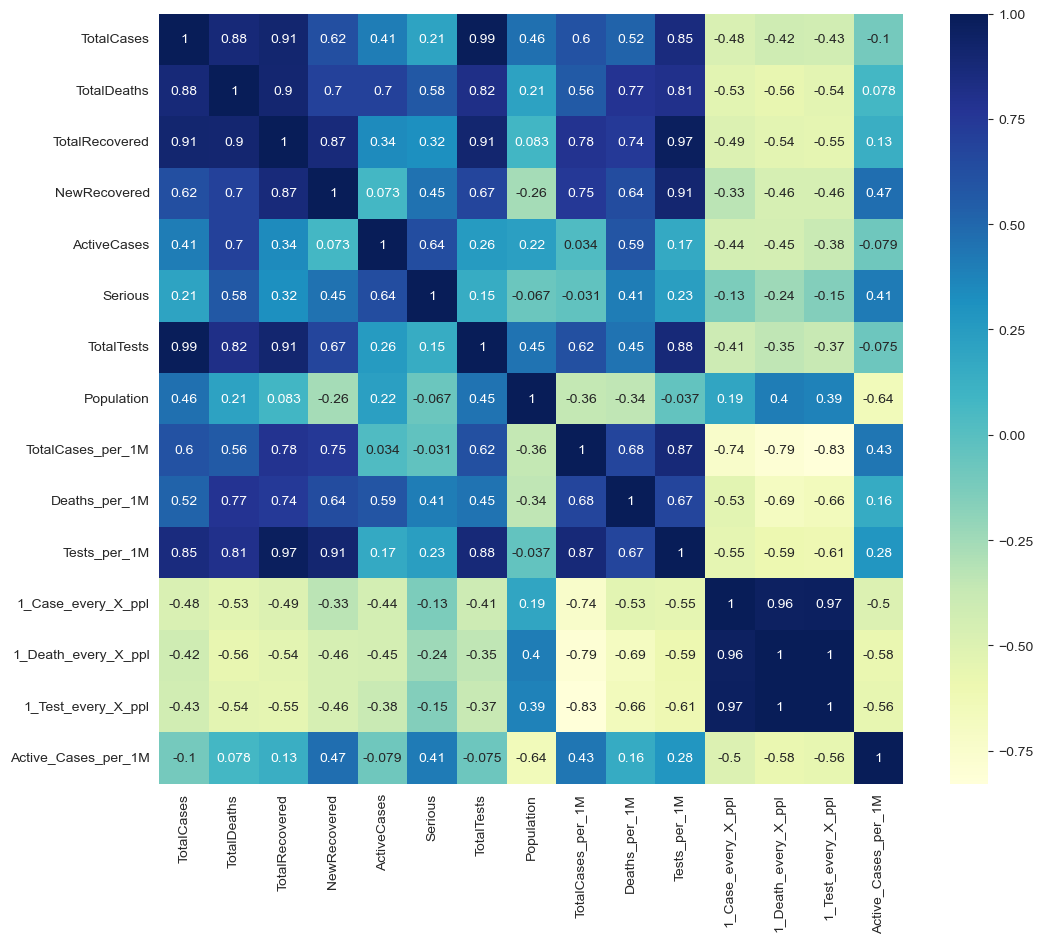

In [592]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_continent_copy.corr(), annot=True, cmap='YlGnBu')

plt.show()

In [593]:
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00
